## Imports

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary
from transformer_v2 import Transformer, PositionalEncoding
from utils.constants import *
from utils.function_utils import *
from utils.visualize import *

### Init Tansformer

In [5]:
src_vocab_size = 10
tgt_vocab_size = 10

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model=MODEL_DIM, num_heads=MODEL_N_HEADS, num_layers=MODEL_N_LAYERS, d_ff=MODEL_FF, dropout=MODEL_DROPOUT, max_len=MODEL_MAX_SEQ_LEN)

### Forward in Transformer

In [6]:
src_tokens_ids_batch = torch.randint(1, 10, size  = (3, 2))
tgt_tokens_ids_batch = torch.randint(1, 10, size  = (3, 2))
out = transformer(src_tokens_ids_batch,tgt_tokens_ids_batch,src_mask = None, tgt_mask = None)

In [8]:
out.shape

torch.Size([3, 2, 10])

### Model Summary

In [29]:
count_parameters(transformer)

90248496

In [30]:
print(transformer)

Transformer(
  (encoder_embedding): Embedding(30000, 512)
  (decoder_embedding): Embedding(30000, 512)
  (pos_encoding): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0-5): 6 x EncoderLayer(
      (self_attn): MultiHeadAttention(
        (linear_q): Linear(in_features=512, out_features=512, bias=True)
        (linear_k): Linear(in_features=512, out_features=512, bias=True)
        (linear_v): Linear(in_features=512, out_features=512, bias=True)
        (linear_out): Linear(in_features=512, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (feed_forward): PositionwiseFeedForward(
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
      )
      (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )

In [2]:
encoding = PositionalEncoding(MODEL_DIM, MODEL_MAX_SEQ_LEN)
encodings_np = encoding.get_encodings()

### Positional Encodings

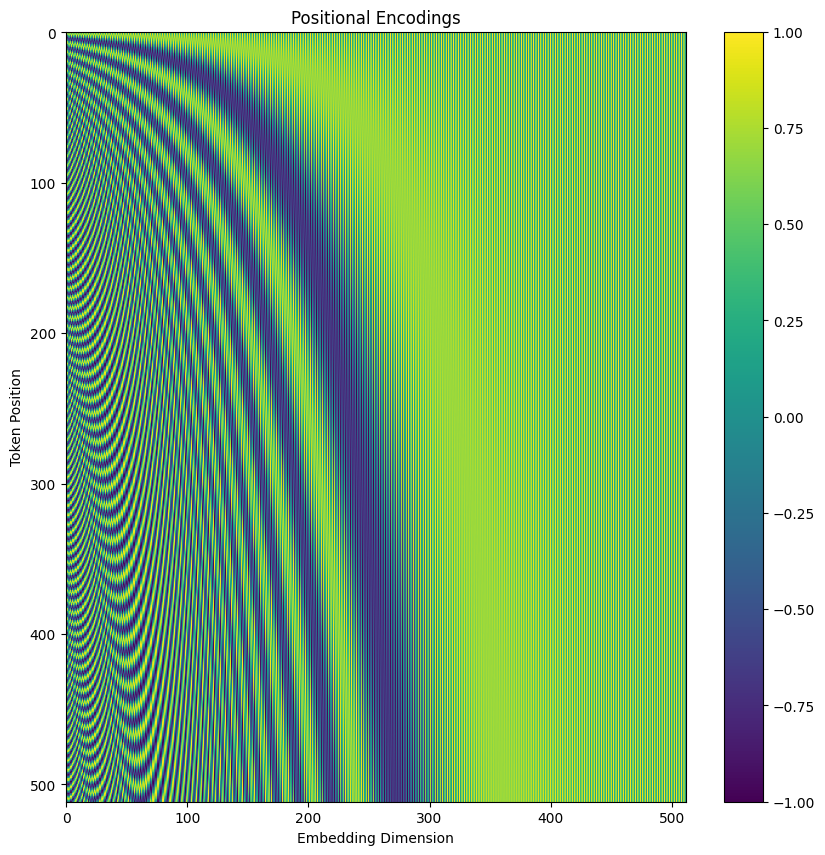

In [3]:
plot_positional_encodings(encodings_np)